In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil

from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

I define my CNN model: I use 4 2D pooling layers, 2 dropout layers with a dense network at the end.

In [18]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())


#model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
   

Model Summary.

In [ ]:
model.summary()

Compile my model. I use binary crossentropy for my loss function since there are only two classes

In [19]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

I did all my augmentation in roboflow so now I create the image data generators to preprocess and resize the images to 150X150.

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        './pics/train',
        #'./roboModels/version11train.v1-version11_train.folder/train',
        classes=['pit','notPit'],
    
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        './pics/test',
        classes=['pit','notPit'],
        
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')


Found 1482 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)


Now I am going to fit my model with 10 epochs.

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=int(1482/16),
      epochs=10,
      validation_data=test_generator,
      validation_steps=412/16)

Epoch 1/10
92/92 [==============================] - 82s 891ms/step - loss: 0.6995 - accuracy: 0.5130 - val_loss: 0.6932 - val_accuracy: 0.4660
Epoch 2/10
92/92 [==============================] - 100s 1s/step - loss: 0.6883 - accuracy: 0.5491 - val_loss: 0.6921 - val_accuracy: 0.4782
Epoch 3/10
92/92 [==============================] - 98s 1s/step - loss: 0.6856 - accuracy: 0.5341 - val_loss: 0.6871 - val_accuracy: 0.5874
Epoch 4/10
92/92 [==============================] - 84s 918ms/step - loss: 0.6884 - accuracy: 0.5402 - val_loss: 0.6877 - val_accuracy: 0.6092
Epoch 5/10
92/92 [==============================] - 93s 1s/step - loss: 0.6734 - accuracy: 0.6016 - val_loss: 0.6825 - val_accuracy: 0.5922
Epoch 6/10
92/92 [==============================] - 94s 1s/step - loss: 0.6712 - accuracy: 0.6098 - val_loss: 0.6806 - val_accuracy: 0.6117
Epoch 7/10
92/92 [==============================] - 93s 1s/step - loss: 0.6677 - accuracy: 0.6071 - val_loss: 0.6801 - val_accuracy: 0.6117
Epoch 8/10
92

In [25]:
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=90)
print('test accuracy', test_accuracy)

test accuracy 0.8276699185371399


I plot the results

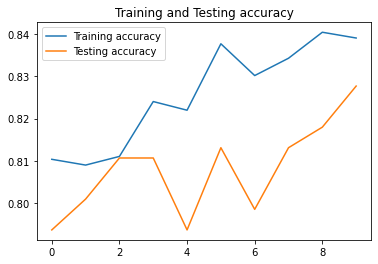

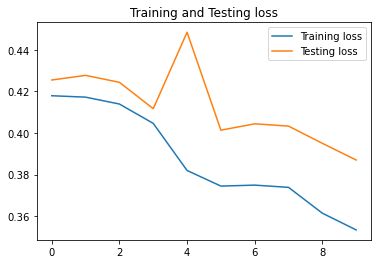

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()

plt.show()


In [26]:
model.save('./final_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./final_model/assets


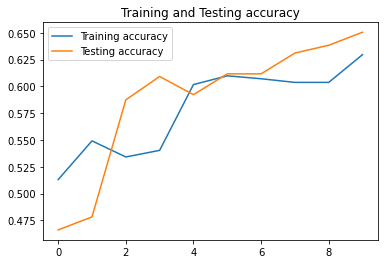

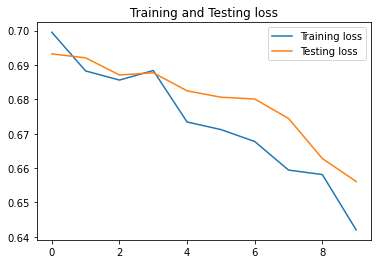

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()

plt.show()
